In [9]:
import numpy as np
import pandas as pd
traindata = pd.read_csv('sign_mnist_train.csv')
trainlabel=traindata['label'].values
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values
trainimages=trainimages.reshape(-1,28,28,1)
testdata = pd.read_csv('sign_mnist_test.csv')
testlabel=testdata['label'].values
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout

classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))

In [12]:
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(trainimages,trainlabel,validation_split=0.2, epochs=25, batch_size=100)

Epoch 1/25
220/220 [==============================] - 9s 41ms/step - loss: 3.8601 - accuracy: 0.4034 - val_loss: 0.9808 - val_accuracy: 0.7348
Epoch 2/25
220/220 [==============================] - 11s 49ms/step - loss: 0.8063 - accuracy: 0.7301 - val_loss: 0.5321 - val_accuracy: 0.8882
Epoch 3/25
220/220 [==============================] - 10s 43ms/step - loss: 0.5344 - accuracy: 0.8205 - val_loss: 0.3771 - val_accuracy: 0.9018
Epoch 4/25
220/220 [==============================] - 10s 44ms/step - loss: 0.3998 - accuracy: 0.8630 - val_loss: 0.2582 - val_accuracy: 0.9583
Epoch 5/25
220/220 [==============================] - 12s 53ms/step - loss: 0.3211 - accuracy: 0.8897 - val_loss: 0.2162 - val_accuracy: 0.9496
Epoch 6/25
220/220 [==============================] - 9s 42ms/step - loss: 0.2818 - accuracy: 0.9029 - val_loss: 0.1784 - val_accuracy: 0.9670
Epoch 7/25
220/220 [==============================] - 9s 43ms/step - loss: 0.2430 - accuracy: 0.9187 - val_loss: 0.1499 - val_accuracy: 0.

In [14]:
accuracy = classifier.evaluate(testimages,testlabel,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 1s 5ms/step - loss: 0.4271 - accuracy: 0.8967
Accuracy:  0.896681547164917


In [15]:
classifier.save('Model.h5')

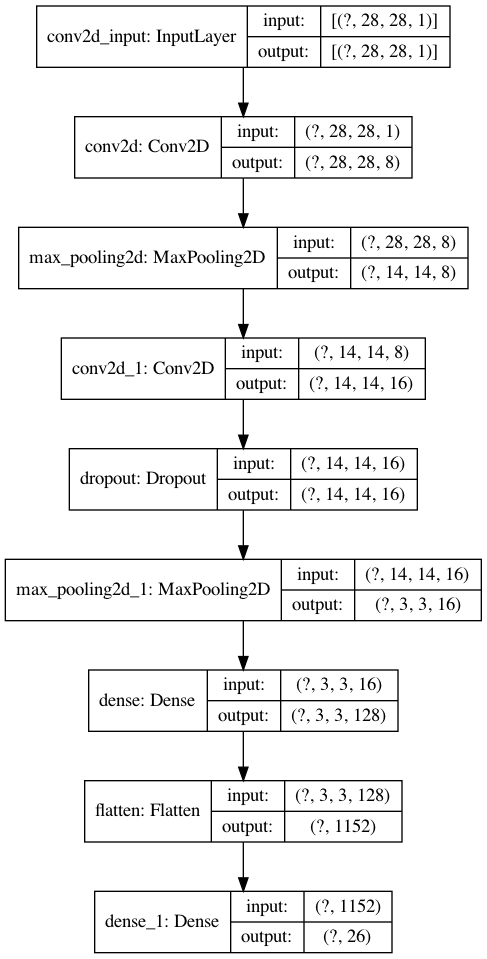

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(classifier,show_shapes=True, show_layer_names=True)